# Mini proyecto 1:  Datos Masivos 1


## Hecho con ❤️ por :
### - Acosta Imandt Daniel
### - Barón Bárcenas Iván
### - Castillo del Valle Pablo David
### - Garduño Martínez Eduardo

### Yelp 
Es una plataforma para compartir opiniones de distintos servicios, sobre todo es el caso de restaurantes, su comida y servicio dado por el personal dentro de él.

Por lo que se recolectó una gran cantidad de reviews de usuarios dentro de la plataforma, llegando a un total de 650,000 registros. En este trabajo vamos a analizar las palabras que se usan en estas reviews.

Esta base de datos se puede encontrar [aquí](https://drive.google.com/file/d/0Bz8a_Dbh9QhbZlU4dXhHTFhZQU0/view?usp=sharing&resourcekey=0-L9narZNA2e1iweRc9-lc7Q)

###  Cargamos librerias

In [0]:
#Importamos los modulos que usamos para las graficas
# Procesamiento del lenguaje natural
!pip install WordCloud
!pip install nltk
!pip install --upgrade pip
!python -m nltk.downloader all
!pip install sentiment-analysis-spanish

#Carga de la biblioteca
import pyspark
# Carga funciones extra
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('primeros_pasos').getOrCreate()
#Carga de NLTK
import nltk
import string
from sentiment_analysis_spanish import sentiment_analysis

#Carga de bibliotecas para graficar
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from wordcloud import WordCloud

     |████████████████████████████████| 371 kB 5.7 MB/s 
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 1.5 MB 5.2 MB/s 
     |████████████████████████████████| 76 kB 2.2 MB/s 
     |████████████████████████████████| 97 kB 3.9 MB/s 
     |████████████████████████████████| 764 kB 8.5 MB/s 
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 2.1 MB 7.7 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
/usr/lib/python3.8/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nlt

### Definimos funciones auxiliares para limpiar los datos

In [0]:
#Definimos la funciones que vamos a usar

from nltk import ngrams

#La siguiente función nos ayuda a quitar las palabras vacias
def removeStopWordsFunct(x):
    from nltk.corpus import stopwords
    stop_words=set(stopwords.words('english'))
    filteredSentence = [w for w in x if not w in stop_words]
    return filteredSentence


#La siguiente función nos ayuda a quitar los signos de puntuación y los espacios en blanco
def removePunctuationsFunct(x):
    list_punct=list(string.punctuation)
    filtered = [''.join(c for c in s if c not in list_punct) for s in x] 
    filtered_space = [s for s in filtered if s] #remove empty space 
    return filtered

#La siguiente función nos ayuda a quedarnos solo con el texto que necesitamos
def separar_campos(renglon):
    renglon_separado = renglon.split(',')
    texto = str(renglon_separado[1])
    return texto

#La siguiente nos ayuda a obtener los bigramas de una oración
def dos_gramas(oracion):
    n_grams = ngrams(oracion.split(), 2)
    L = []
    for gram in n_grams:
        L.append(gram)
    return L

#La siguiente nos ayuda a obtener los trigramas de una oración
def tres_gramas(oracion):
    n_grams = ngrams(oracion.split(), 3)
    L = []
    for gram in n_grams:
        L.append(gram)
    return L

### Preprocesamos nuestros datos

In [0]:
rdd_yelp = spark.sparkContext.textFile('/FileStore/tables/train.csv').map(lambda x: x.split('*'))
rdd_yelp.take(4)

Out[5]: [['"5","dr. goldberg offers everything i look for in a general practitioner.  he\'s nice and easy to talk to without being patronizing; he\'s always on time in seeing his patients; he\'s affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i\'m sitting here trying to think of any complaints i have about him, but i\'m really drawing a blank."'],
 ['"2","Unfortunately, the frustration of being Dr. Goldberg\'s patient is a repeat of the experience I\'ve had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don\'t get it.  You have of

In [0]:
#Guardamos nuestros datos en un RDD
rdd_yelp = spark.sparkContext.textFile('/FileStore/tables/train.csv').map(lambda x: x.split('*'))

#Transformamos las palabras a minusculas  y nos quedamos con los textos
rdd_minus = rdd_yelp.map(lambda x: (x[0].lower())).map(separar_campos)

#Separamos las palabras del texto y quitamos las palabras vacías
rdd_palabras = rdd_minus.map(lambda x: (x.split(' '))).map(removeStopWordsFunct)

#Usamos una de nuestras funciones auxilaires para quitar los signos de puntación y los espacios en blanco
rdd_punct = rdd_palabras.map(removePunctuationsFunct)
rdd_punct.take(5)

Out[6]: [['dr',
  'goldberg',
  'offers',
  'everything',
  'look',
  'general',
  'practitioner',
  '',
  'hes',
  'nice',
  'easy',
  'talk',
  'without',
  'patronizing',
  'hes',
  'always',
  'time',
  'seeing',
  'patients',
  'hes',
  'affiliated',
  'topnotch',
  'hospital',
  'nyu',
  'parents',
  'explained',
  'important',
  'case',
  'something',
  'happens',
  'need',
  'surgery',
  'get',
  'referrals',
  'see',
  'specialists',
  'without',
  'see',
  'first',
  '',
  'really'],
 ['unfortunately'],
 ['been',
  'going',
  'dr',
  'goldberg',
  '10',
  'years',
  'think',
  'one',
  '1st',
  'patients',
  'started',
  'mhmg',
  'hes',
  'great',
  'years',
  'really',
  'big',
  'picture'],
 ['got',
  'letter',
  'mail',
  'last',
  'week',
  'said',
  'dr',
  'goldberg',
  'moving',
  'arizona',
  'take',
  'new',
  'position',
  'june',
  '',
  'missed',
  'much',
  '',
  'nni',
  'think',
  'finding',
  'new',
  'doctor',
  'nyc',
  'actually',
  'like',
  'might',
  'a

### Ocurrencias totales depalabras, bigramas y trigramas

In [0]:
#Procedemos a encontrar las ocurrencias totales de palabras, bigramas y trigramas

freqDistRDD = rdd_punct.flatMap(lambda x : nltk.FreqDist(x).most_common()).reduceByKey(lambda x,y : x+y).sortBy(lambda x: x[1], ascending = False) 


#Quitamos el primer elemento de nuestro resultado que en este caso no nos aporta información
columnas = freqDistRDD.take(1)[0]
freqDistRDD = freqDistRDD.filter(lambda renglon : renglon != columnas)


#Mostramos las palabras con mayor número de apariciones
print("\nPalabras con mayor número de apariciones totales")
for palabra in freqDistRDD.take(3):
    print(palabra)
    
#Para los bigramas
bigramas = rdd_punct.map(lambda x: ' '.join(x)).map(dos_gramas).flatMap(lambda x:nltk.FreqDist(x).most_common()).map(lambda x: x).reduceByKey(lambda x,y : x+y).sortBy(lambda x: x[1], ascending = False)

print("\nBigramas con mayor número de apariciones totales")
for palabra in bigramas.take(3):
    print(palabra)

#Para los trigramas    
trigramas = rdd_punct.map(lambda x: ' '.join(x)).map(tres_gramas).flatMap(lambda x:nltk.FreqDist(x).most_common()).map(lambda x: x).reduceByKey(lambda x,y : x+y).sortBy(lambda x: x[1], ascending = False)

print("\nTrigramas con mayor número de apariciones totales")
for palabra in trigramas.take(3):
    print(palabra)


Palabras con mayor número de apariciones totales
('place', 151139)
('food', 125782)
('i', 117657)

Bigramas con mayor número de apariciones totales
(('this', 'place'), 18054)
(('first', 'time'), 13769)
(('customer', 'service'), 10141)

Trigramas con mayor número de apariciones totales
(('i', 'love', 'place'), 1946)
(('ive', 'ever', 'had'), 1525)
(('this', 'place', 'great'), 1130)


In [0]:
#Transformamos nuestros RDDS a dataframes para poder graficarlos
#Primero las palabras
dfpal=(freqDistRDD.toDF()).toPandas()

#Ahora los bigramas y trigramas
dfprovbi=(bigramas.toDF()).toPandas()
dfprovtri=(trigramas.toDF()).toPandas()
dfbi=dfprovbi
dftri=dfprovtri
for i in range(len(dfprovbi.index)):
    dfbi.at[i, "_1"]= " ".join(dfprovbi["_1"][i].values())
    
for i in range(len(dfprovtri.index)):
    dftri.at[i, "_1"]= " ".join(dfprovtri["_1"][i].values())

#A partir de nuestros dataframes obtenemos 3 diccionarios para poder graficar un word cloud
d1 = {}
d2 = {}
d3={}
for a, x in dfpal.values:
    d1[a] = x
for a, x in dfbi.values:
    d2[a] = x
for a, x in dftri.values:
    d3[a] = x

### Graficamos nuestros resultados totales

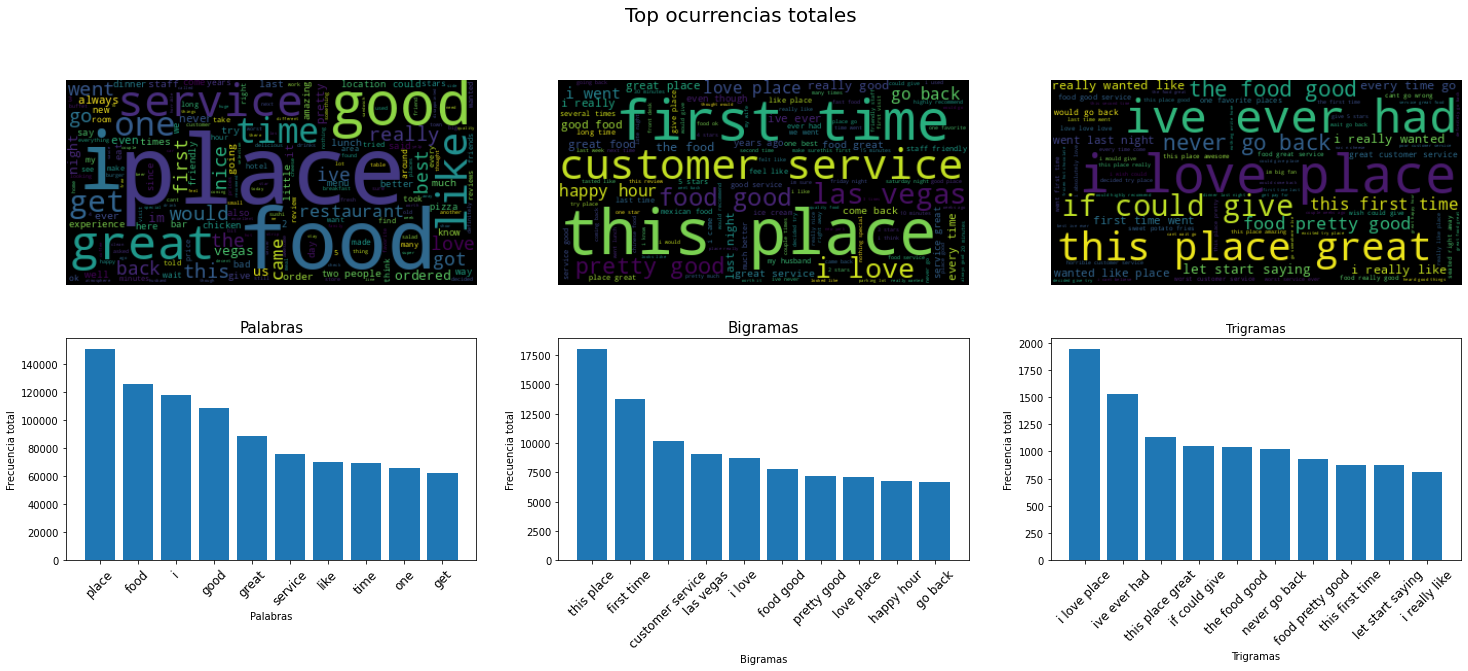

In [0]:
#Graficamos, creamos nuestra gráfica de 2x3 y ajustamos el tamaño
plt.rcParams["figure.figsize"] = [25,9]
fig, ((axi1,axi2,axi3),(ax1,ax2, ax3))= plt.subplots(2,3)
fig.suptitle("Top ocurrencias totales", fontsize=20)

#Graficamos primero los wordclouds
#Para las palabras
wordcloud1 = WordCloud()
wordcloud1.generate_from_frequencies(frequencies=d1)
axi1.imshow(wordcloud1, interpolation="bilinear")
axi1.axis("off")


#Graficando los bigramas
wordcloud2 = WordCloud()
wordcloud2.generate_from_frequencies(frequencies=d2)
axi2.imshow(wordcloud2, interpolation="bilinear")
axi2.axis("off")


#Graficando los trigramas
wordcloud3 = WordCloud()
wordcloud3.generate_from_frequencies(frequencies=d3)
axi3.imshow(wordcloud3, interpolation="bilinear")
axi3.axis("off")

#Ahora graficamos las frecuencias
#Palabras
ax1.set_title("Palabras", fontsize=15)
ax1.bar(dfpal.head(10)["_1"],dfpal.head(10)["_2"])
ax1.set_ylabel("Frecuencia total")
ax1.set_xlabel("Palabras")
ax1.tick_params(axis="x", labelrotation=45, labelsize=12)


#Bigramas
ax2.set_title("Bigramas", fontsize=15)
ax2.bar(dfbi.head(10)["_1"],dfbi.head(10)["_2"])
ax2.set_ylabel("Frecuencia total")
ax2.set_xlabel("Bigramas")
ax2.tick_params(axis="x", labelrotation=45, labelsize=12)


#Trigramas
ax3.set_title("Trigramas", fontsize=12)
ax3.bar(dftri.head(10)["_1"],dftri.head(10)["_2"])
ax3.set_ylabel("Frecuencia total")
ax3.set_xlabel("Trigramas")
ax3.tick_params(axis="x", labelrotation=45, labelsize=12)

### Ahora vemos las ocurrencias por documento

In [0]:
#Ahora contaremos el número de ocurrencias por documento

#Palabras
#Usamos set para quitar los elementos duplicados de un documento, despues volvemos convertirlo a lista y hacemos algunos pasos de la celda anterior
palDoc = rdd_punct.map(lambda x : set(x)).map(lambda x: list(x)).flatMap(lambda x : nltk.FreqDist(x).most_common()).reduceByKey(lambda x,y : x+y).sortBy(lambda x: x[1], ascending = False) 


#Quitamos el primer elemento de nuestro resultado que en este caso no nos aporta información
columnas = palDoc.take(1)[0]
palDoc = palDoc.filter(lambda renglon : renglon != columnas)
print("\nLas palabras más frecuentes por documento son:")
for palabra in palDoc.take(5):
    print(palabra)

#Bigramas
biDoc = rdd_punct.map(lambda x : set(x)).map(lambda x: list(x)).map(lambda x: ' '.join(x)).map(dos_gramas).flatMap(lambda x:nltk.FreqDist(x).most_common()).map(lambda x: x).reduceByKey(lambda x,y : x+y).sortBy(lambda x: x[1], ascending = False)
print("\nLos bigramas más frecuentes por documento son:")
for palabra in biDoc.take(5):
    print(palabra)

#Trigramas
triDoc = rdd_punct.map(lambda x : set(x)).map(lambda x: list(x)).map(lambda x: ' '.join(x)).map(tres_gramas).flatMap(lambda x:nltk.FreqDist(x).most_common()).map(lambda x: x).reduceByKey(lambda x,y : x+y).sortBy(lambda x: x[1], ascending = False)
print("\nLos trigramas más frecuentes por documento son:")
for palabra in triDoc.take(5):
    print(palabra)


Las palabras más frecuentes por documento son:
('place', 129191)
('i', 116783)
('food', 104565)
('good', 90533)
('great', 76209)

Los bigramas más frecuentes por documento son:
(('place', 'i'), 22825)
(('service', 'great'), 12485)
(('great', 'food'), 6531)
(('get', 'go'), 6209)
(('service', 'food'), 5541)

Los trigramas más frecuentes por documento son:
(('service', 'great', 'food'), 1394)
(('new', 'place', 'i'), 970)
(('love', 'service', 'great'), 813)
(('service', 'great', 'time'), 660)
(('place', 'i', 'ive'), 660)


In [0]:
#Transformamos nuestros RDDS a dataframes para poder graficarlos
#Primero las palabras
dfpd=(palDoc.toDF()).toPandas()

#Ahora los bigramas y trigramas
dfbidtemp=(biDoc.toDF()).toPandas()
dftridtemp=(triDoc.toDF()).toPandas()
dfbid=dfbidtemp
dftrid=dftridtemp
for i in range(len(dfbidtemp.index)):
    dfbid.at[i, "_1"]= " ".join(dfbidtemp["_1"][i].values())
    
for i in range(len(dftridtemp.index)):
    dftrid.at[i, "_1"]= " ".join(dftridtemp["_1"][i].values())

### Graficamos

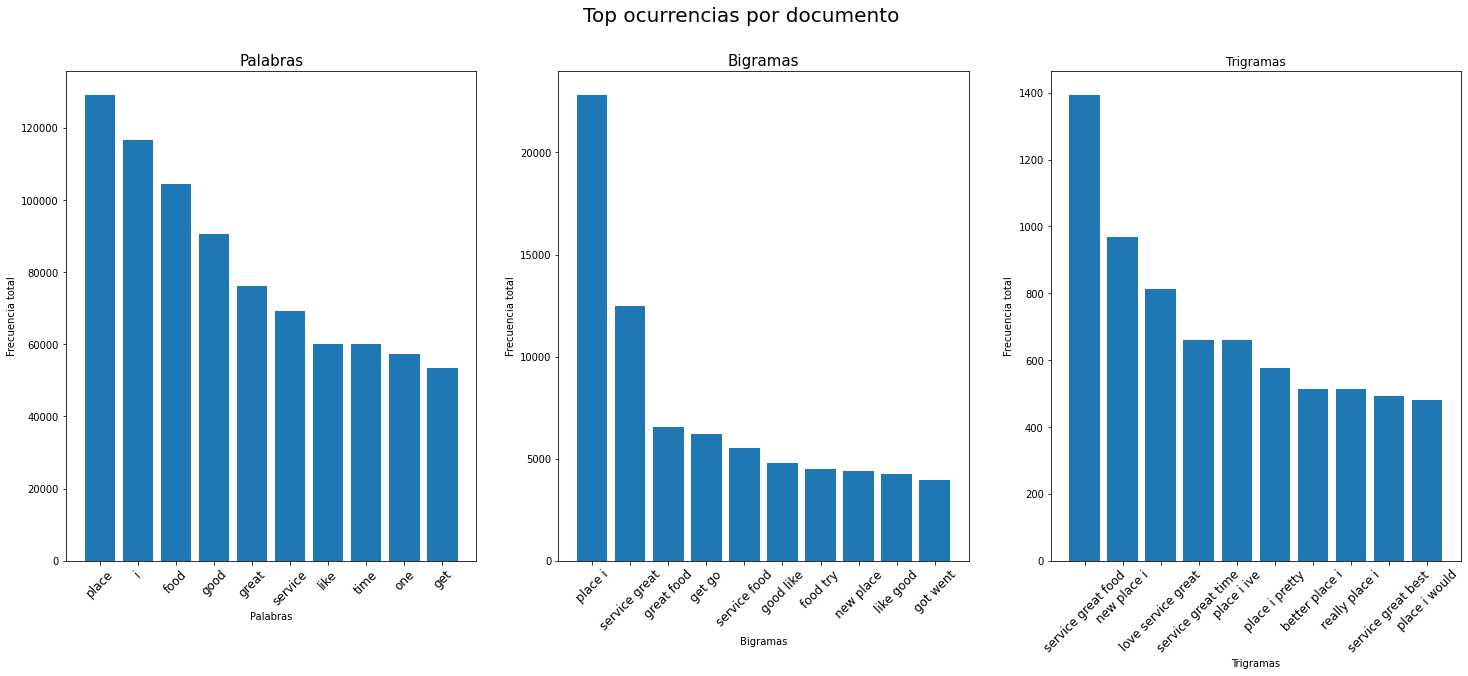

In [0]:
#Graficamos, creamos nuestra gráfica de 1x3 y ajustamos el tamaño
plt.rcParams["figure.figsize"] = [25,9]
fig, (ax1,ax2, ax3)= plt.subplots(1,3)
fig.suptitle("Top ocurrencias por documento", fontsize=20)

#Ahora graficamos las frecuencias por documento
#Palabras
ax1.set_title("Palabras", fontsize=15)
ax1.bar(dfpd.head(10)["_1"],dfpd.head(10)["_2"])
ax1.set_ylabel("Frecuencia total")
ax1.set_xlabel("Palabras")
ax1.tick_params(axis="x", labelrotation=45, labelsize=12)


#Bigramas
ax2.set_title("Bigramas", fontsize=15)
ax2.bar(dfbid.head(10)["_1"],dfbid.head(10)["_2"])
ax2.set_ylabel("Frecuencia total")
ax2.set_xlabel("Bigramas")
ax2.tick_params(axis="x", labelrotation=45, labelsize=12)


#Trigramas
ax3.set_title("Trigramas", fontsize=12)
ax3.bar(dftrid.head(10)["_1"],dftrid.head(10)["_2"])
ax3.set_ylabel("Frecuencia total")
ax3.set_xlabel("Trigramas")
ax3.tick_params(axis="x", labelrotation=45, labelsize=12)

### Palabras menos usadas totales

In [0]:
# Ahora queremos ver cuales son el 5% de las palabras menos usadas en total
#Por lo que hacemos una lista total y a esa le quitamos la lista del 95% de las palabras mas usadas
r_lasts=list(set(freqDistRDD.take(freqDistRDD.count())) - set(freqDistRDD.take((int(freqDistRDD.count()*.95)))))
print("\n Palabras menos usadas en todos los documentos")
for i in range(5):
    print(r_lasts[i])

# Ahora queremos ver cuales son el 5% de los bigramas menos usadas en total
#Por lo que hacemos una lista total y a esa le quitamos la lista del 95% de las palabras mas usadas
r2_lasts=list(set(bigramas.take(bigramas.count())) - set(bigramas.take((int(bigramas.count()*.95)))))
print("\n Bigramas menos usadas en todos los documentos")
for i in range(5):
    print(r2_lasts[i])


# Ahora queremos ver cuales son el 5% de los trigramas menos usadas en total
#Por lo que hacemos una lista total y a esa le quitamos la lista del 95% de las palabras mas usadas
r3_lasts=list(set(trigramas.take(trigramas.count())) - set(trigramas.take((int(trigramas.count()*.95)))))
print("\n Trigramas menos usadas en todos los documentos")
for i in range(5):
    print(r3_lasts[i])



 Palabras menos usadas en todos los documentos
('carnncalled', 1)
('18b', 1)
('kidschicken', 1)
('dropnnwith', 1)
('qualitynnwould', 1)

 Bigramas menos usadas en todos los documentos
(('giant', 'roomnnqcbf'), 1)
(('pricy', 'yes'), 1)
(('smoothies', 'actually'), 1)
(('bathroomnnthey', 'opened'), 1)
(('inside', 'yellow'), 1)


### Conclusiones

Al ver las palabras más utilizadas tanto por review como por el total de los datos, notamos algo curioso y es que las palabras más utilizadas suelen ser casi siempre las mismas en los dos análisis.

Al ver los bigramas y trigramas si se logran notar oraciones que tienen sentido y van de acuerdo a lo que la gente diría sobre algún restaurante o platillo, como es el caso de " love service" o "great food", además de eso, notamos que las palabras con más frecuencia suelen ser pequeñas oraciones con un carácter positivo, en donde en donde solo encontramos una excepción la cual es la oración "never go back".Por lo que las reviews que se suelen dar en este servicio suelen ser bastante optimistas.

Al ver las palabras menos usadas en total nos encontramos con algo curioso y es que por lo menos ese 5% solo se utiliza una vez y suele ser ocasionada por palabras raras u errores ortográficos, por lo que tiene sentido que no se utilicen.

Por último al ver el comportamiento general de todas las palabras nos impactó como es que hay muy pocas palabras que se usan muchas veces y hay demasiadas palabras que son usadas casi nunca (y eso que quitamos los conectores).